In [24]:
scores = '../out/ko_scores_rep.txt'
orig = '../out/ko_scores.txt'

In [2]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')

plt.rc('font', size=11)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=11)

In [3]:
import pandas as pd
from scipy import stats

In [4]:
m = pd.read_table(scores, index_col=[3, 1, 0, 2, 5])

In [5]:
b1 = m.loc['B1']
b2 = m.loc['B2']

In [6]:
c1 = set(b1.index)
c2 = set(b2.index)
idx = sorted(c1.intersection(c2))

In [7]:
a1 = b1.loc[idx]['score']
a2 = b2.loc[idx]['score']

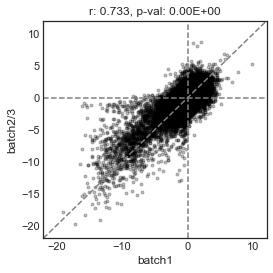

In [8]:
plt.figure(figsize=(4, 4))

plt.plot(a1,
         a2,
         'k.',
         alpha=0.25)
plt.plot([-22, 12],
         [-22, 12],
         '--',
         color='grey')

plt.xlim(-22, 12)
plt.ylim(-22, 12)

plt.axvline(0,
            color='grey',
            linestyle='dashed')
plt.axhline(0,
            color='grey',
            linestyle='dashed')

plt.xlabel('batch1')
plt.ylabel('batch2/3')

r, p = stats.pearsonr(a1,
                      a2)

plt.title('r: %.3f, p-val: %.2E' % (r, p));

In [9]:
res = []
for c in {x[0]
          for x in b1.index}.intersection({x[0]
                                           for x in b2.index}):
    m1 = b1.loc[c]
    m2 = b2.loc[c]
    c1 = set(m1.index)
    c2 = set(m2.index)
    idx = sorted(c1.intersection(c2))
    a1 = m1.loc[idx]['score']
    a2 = m2.loc[idx]['score']
    if len(idx) > 10:
        r, p = stats.pearsonr(a1, a2)
        res.append((c, r, p))
r = pd.DataFrame(res,
                 columns=['condition',
                          'r', 'p'])

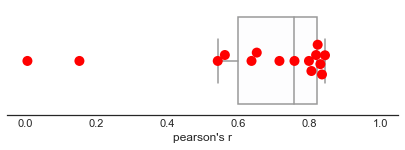

In [10]:
plt.figure(figsize=(7, 2))

sns.boxplot(data=r,
            x='r',
            color=sns.xkcd_rgb['pale grey'])
sns.swarmplot(data=r,
              x='r',
              size=10,
              color='r')
plt.xlim(-0.05, 1.05)
plt.xlabel('pearson\'s r')
sns.despine(left=True);

In [11]:
r.sort_values('r')

,condition,r,p
8,Anaerobic growth (48H),0.006962,5.864659e-01
14,Nystatin (48H),0.153378,3.321169e-33
9,DMSO 1% (48H),0.542952,0.000000e+00
3,Amphotericin B (48H),0.562969,0.000000e+00
4,SC + hepes (48H),0.638013,0.000000e+00
2,Sorbitol 1M (48H),0.652783,0.000000e+00
1,6-AU (48H),0.716673,0.000000e+00
7,39ºC (48H),0.759051,0.000000e+00
10,Glycerol 2% (72H),0.799828,0.000000e+00
5,Glycerol 2% (48H),0.806726,0.000000e+00


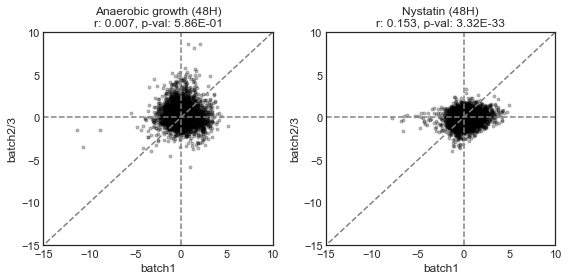

In [23]:
plt.figure(figsize=(8, 4))

plt.subplot(121)

c = 'Anaerobic growth (48H)'
m1 = b1.loc[c]
m2 = b2.loc[c]
c1 = set(m1.index)
c2 = set(m2.index)
idx = sorted(c1.intersection(c2))
a1 = m1.loc[idx]['score']
a2 = m2.loc[idx]['score']

plt.plot(a1,
         a2,
         'k.',
         alpha=0.25)
plt.plot([-22, 12],
         [-22, 12],
         '--',
         color='grey')

plt.xlim(-15, 10)
plt.ylim(-15, 10)

plt.axvline(0,
            color='grey',
            linestyle='dashed')
plt.axhline(0,
            color='grey',
            linestyle='dashed')

plt.xlabel('batch1')
plt.ylabel('batch2/3')

r, p = stats.pearsonr(a1,
                      a2)

plt.title('%s\nr: %.3f, p-val: %.2E' % (c, r, p))

plt.subplot(122)

c = 'Nystatin (48H)'
m1 = b1.loc[c]
m2 = b2.loc[c]
c1 = set(m1.index)
c2 = set(m2.index)
idx = sorted(c1.intersection(c2))
a1 = m1.loc[idx]['score']
a2 = m2.loc[idx]['score']

plt.plot(a1,
         a2,
         'k.',
         alpha=0.25)
plt.plot([-22, 12],
         [-22, 12],
         '--',
         color='grey')

plt.xlim(-15, 10)
plt.ylim(-15, 10)

plt.axvline(0,
            color='grey',
            linestyle='dashed')
plt.axhline(0,
            color='grey',
            linestyle='dashed')

plt.xlabel('batch1')
plt.ylabel('batch2/3')

r, p = stats.pearsonr(a1,
                      a2)

plt.title('%s\nr: %.3f, p-val: %.2E' % (c, r, p))

plt.tight_layout();

In [27]:
o = pd.read_table(orig, index_col=[1, 0, 2, 4])

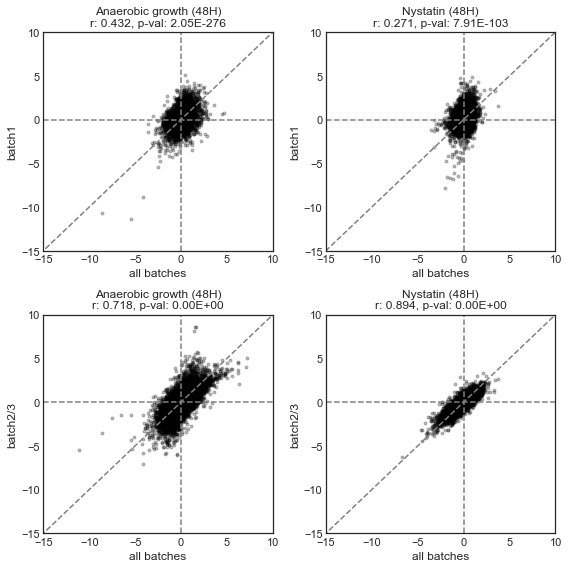

In [34]:
plt.figure(figsize=(8, 8))

plt.subplot(221)

c = 'Anaerobic growth (48H)'
m1 = o.loc[c]
m2 = b1.loc[c]
c1 = set(m1.index)
c2 = set(m2.index)
idx = sorted(c1.intersection(c2))
a1 = m1.loc[idx]['score']
a2 = m2.loc[idx]['score']

plt.plot(a1,
         a2,
         'k.',
         alpha=0.25)
plt.plot([-22, 12],
         [-22, 12],
         '--',
         color='grey')

plt.xlim(-15, 10)
plt.ylim(-15, 10)

plt.axvline(0,
            color='grey',
            linestyle='dashed')
plt.axhline(0,
            color='grey',
            linestyle='dashed')

plt.xlabel('all batches')
plt.ylabel('batch1')

r, p = stats.pearsonr(a1,
                      a2)

plt.title('%s\nr: %.3f, p-val: %.2E' % (c, r, p))

plt.subplot(222)

c = 'Nystatin (48H)'
m1 = o.loc[c]
m2 = b1.loc[c]
c1 = set(m1.index)
c2 = set(m2.index)
idx = sorted(c1.intersection(c2))
a1 = m1.loc[idx]['score']
a2 = m2.loc[idx]['score']

plt.plot(a1,
         a2,
         'k.',
         alpha=0.25)
plt.plot([-22, 12],
         [-22, 12],
         '--',
         color='grey')

plt.xlim(-15, 10)
plt.ylim(-15, 10)

plt.axvline(0,
            color='grey',
            linestyle='dashed')
plt.axhline(0,
            color='grey',
            linestyle='dashed')

plt.xlabel('all batches')
plt.ylabel('batch1')

r, p = stats.pearsonr(a1,
                      a2)

plt.title('%s\nr: %.3f, p-val: %.2E' % (c, r, p))

plt.subplot(223)

c = 'Anaerobic growth (48H)'
m1 = o.loc[c]
m2 = b2.loc[c]
c1 = set(m1.index)
c2 = set(m2.index)
idx = sorted(c1.intersection(c2))
a1 = m1.loc[idx]['score']
a2 = m2.loc[idx]['score']

plt.plot(a1,
         a2,
         'k.',
         alpha=0.25)
plt.plot([-22, 12],
         [-22, 12],
         '--',
         color='grey')

plt.xlim(-15, 10)
plt.ylim(-15, 10)

plt.axvline(0,
            color='grey',
            linestyle='dashed')
plt.axhline(0,
            color='grey',
            linestyle='dashed')

plt.xlabel('all batches')
plt.ylabel('batch2/3')

r, p = stats.pearsonr(a1,
                      a2)

plt.title('%s\nr: %.3f, p-val: %.2E' % (c, r, p))

plt.subplot(224)

c = 'Nystatin (48H)'
m1 = o.loc[c]
m2 = b2.loc[c]
c1 = set(m1.index)
c2 = set(m2.index)
idx = sorted(c1.intersection(c2))
a1 = m1.loc[idx]['score']
a2 = m2.loc[idx]['score']

plt.plot(a1,
         a2,
         'k.',
         alpha=0.25)
plt.plot([-22, 12],
         [-22, 12],
         '--',
         color='grey')

plt.xlim(-15, 10)
plt.ylim(-15, 10)

plt.axvline(0,
            color='grey',
            linestyle='dashed')
plt.axhline(0,
            color='grey',
            linestyle='dashed')

plt.xlabel('all batches')
plt.ylabel('batch2/3')

r, p = stats.pearsonr(a1,
                      a2)

plt.title('%s\nr: %.3f, p-val: %.2E' % (c, r, p))

plt.tight_layout();

<h5><a href="javascript:toggle()" target="_self">toggle source code</a></h5>